<a href="https://colab.research.google.com/github/lpatel29/Major-Project--DS/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv('/content/drive/MyDrive/Classroom/DS-05-BM3/PPT_Dataset/owid-covid-data.csv')
dataframe.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
df = dataframe.copy()
df.head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99356 entries, 0 to 99355
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               99356 non-null  object 
 1   continent                              94696 non-null  object 
 2   location                               99356 non-null  object 
 3   date                                   99356 non-null  object 
 4   total_cases                            95780 non-null  float64
 5   new_cases                              95777 non-null  float64
 6   new_cases_smoothed                     94767 non-null  float64
 7   total_deaths                           85655 non-null  float64
 8   new_deaths                             85811 non-null  float64
 9   new_deaths_smoothed                    94767 non-null  float64
 10  total_cases_per_million                95270 non-null  float64
 11  ne

# 1. PREPROCESSING

In [6]:
df.drop(['reproduction_rate','icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','stringency_index','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality'],axis=1,inplace=True)
df.drop(['new_cases_smoothed','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_units','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million'],axis=1,inplace=True)
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [8]:
#renaming date as ds
df = df.rename(columns= {df.columns[3]:'ds'})
#converting date as timestamp
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
print(min(df.ds))
print(max(df.ds))

2020-01-01 00:00:00
2021-07-01 00:00:00


## Continentwise New Cases

Text(0.5, 1.0, 'Continent wise Covid-19 New Cases')

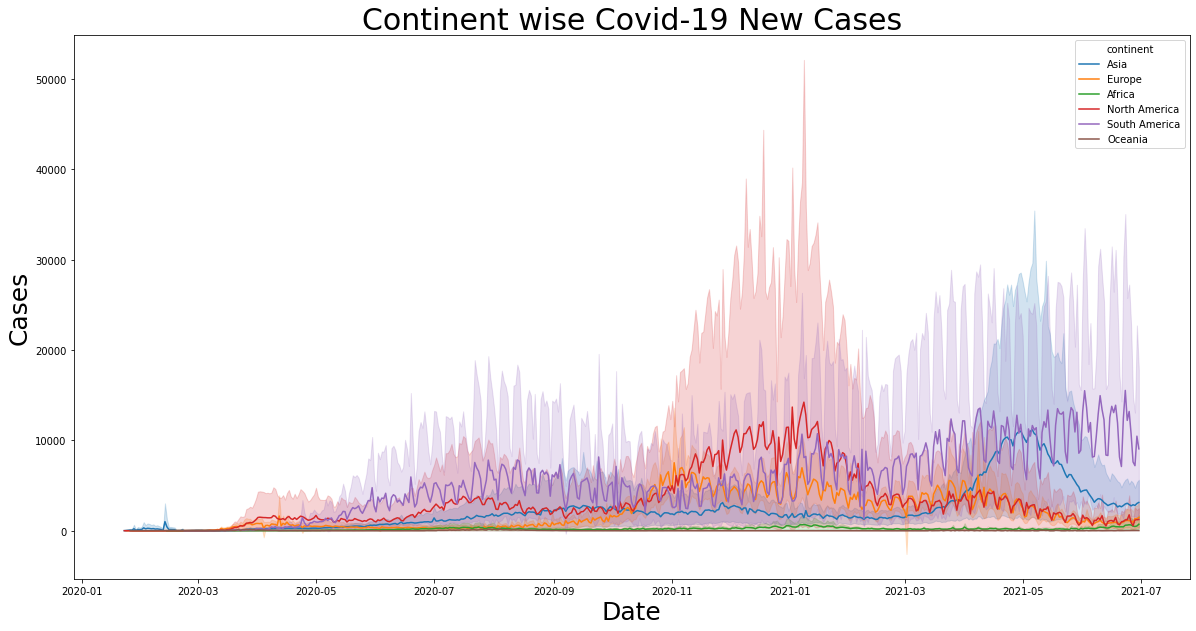

In [10]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds", y = "new_cases",hue="continent", data=df);
plt.xlabel("Date", size=25)
plt.ylabel("New Cases", size=25)
plt.title("Continent wise Covid-19 New Cases", size=30)

## Continentwise Total Cases

Text(0.5, 1.0, 'Continent wise Covid-19 Total Cases')

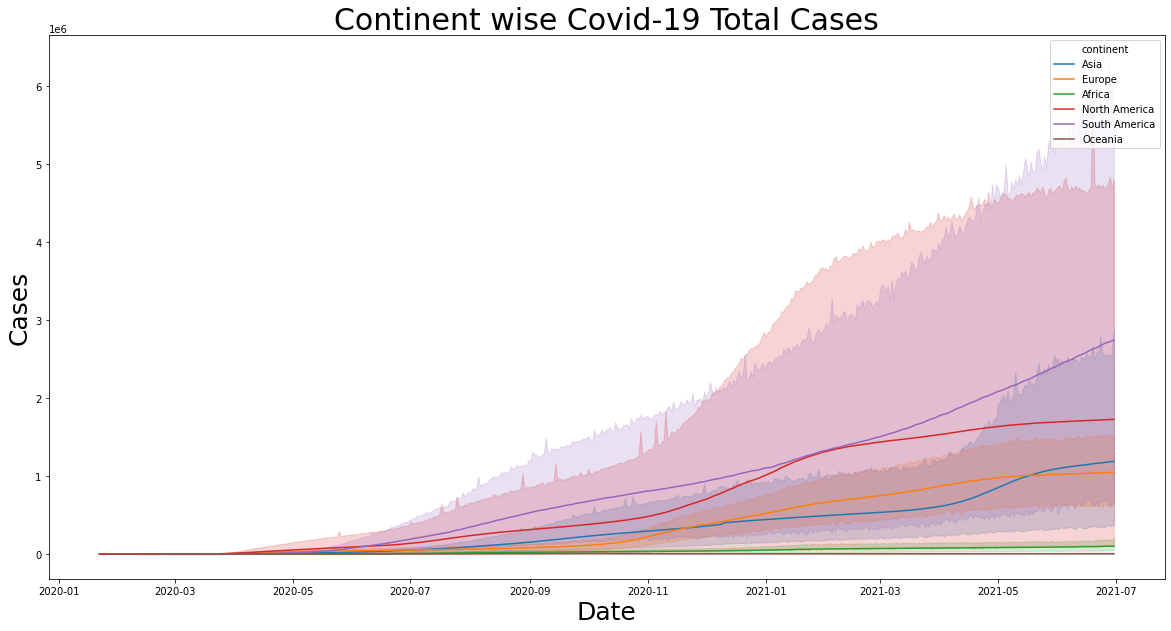

In [11]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds", y = "total_cases",hue="continent", data=df);
plt.xlabel("Date", size=25)
plt.ylabel("Total Cases", size=25)
plt.title("Continent wise Covid-19 Total Cases", size=30)

## Continentwise Total Tests

Text(0.5, 1.0, 'Continent wise Covid-19 Total Tests')

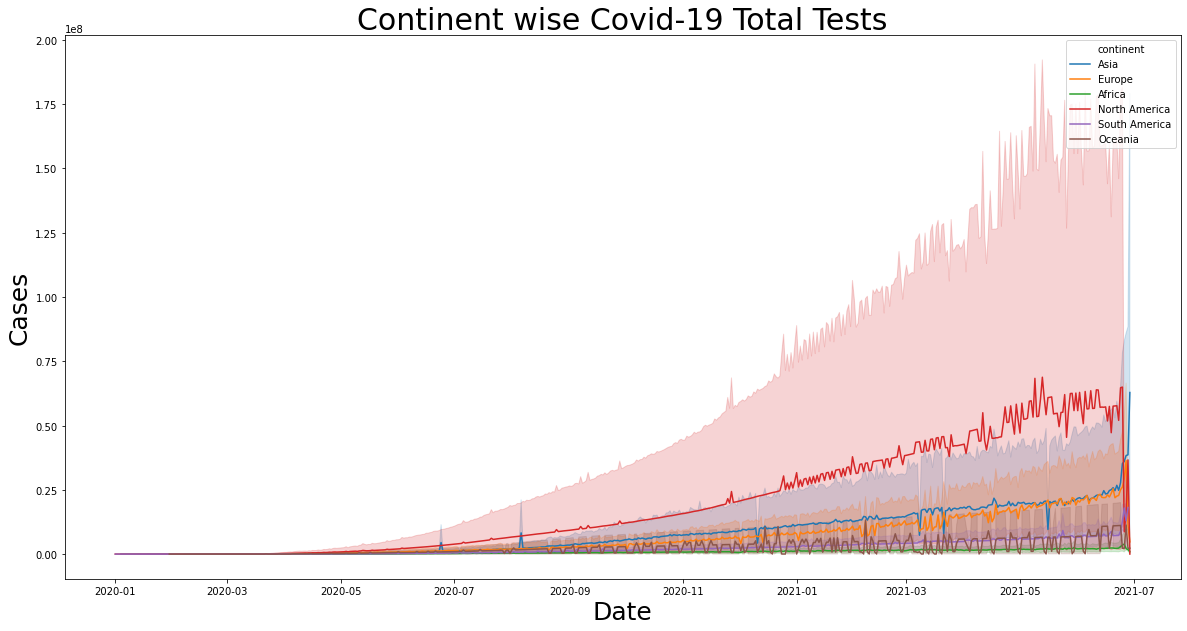

In [12]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds",y = "total_tests",hue="continent", data=df);
plt.xlabel("Date", size=25)
plt.ylabel("Total Tests", size=25)
plt.title("Continent wise Covid-19 Total Tests", size=30)

## Continentwise Total Deaths

Text(0.5, 1.0, 'Continent wise Covid-19 Total Deaths')

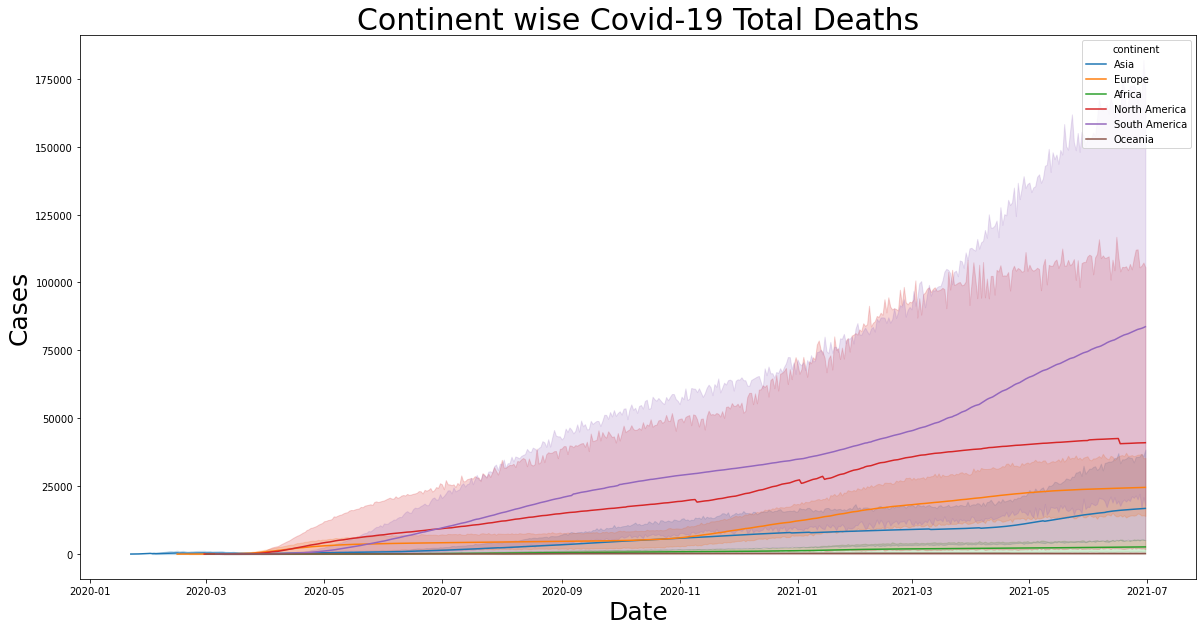

In [93]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds",y = "total_deaths",hue="continent", data=df);
plt.xlabel("Date", size=25)
plt.ylabel("Death Cases", size=25)
plt.title("Continent wise Covid-19 Total Deaths", size=30)

## Continentwise Total Vaccinations

Text(0.5, 1.0, 'Continent wise Covid-19 Total Vaccinations')

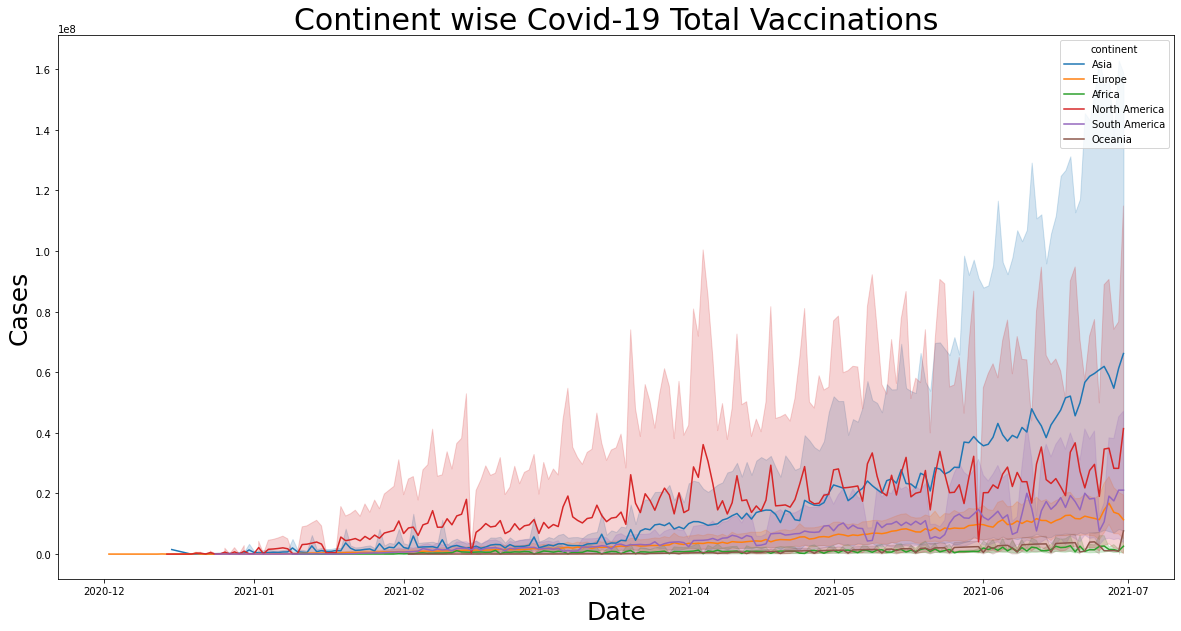

In [13]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds", y="total_vaccinations",hue="continent", data=df);
plt.xlabel("Date", size=25)
plt.ylabel("Total Vaccinations", size=25)
plt.title("Continent wise Covid-19 Total Vaccinations", size=30)

# COUNTRY WISE ANALYSIS
PREPROCESSING:

1.   DELETING -VE VALUES
2.   LISTING TOP 10 COUNTRIES WITH RESPECT TO TOTAL CASES, DEATHS, VACCINATED




In [14]:
topdf = df[['ds','iso_code','continent','location','total_tests','total_cases','total_deaths','total_vaccinations']]
topdf.head()
df1 = topdf.copy()

# Finding most test cases country

In [15]:
df1.nlargest(5,'total_deaths')

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
97970,2021-06-30,OWID_WRL,NaN,World,NaN,182202370.0,3947020.0,3.086573e+09
97969,2021-06-29,OWID_WRL,NaN,World,NaN,181810531.0,3937868.0,3.050572e+09
97968,2021-06-28,OWID_WRL,NaN,World,NaN,181425785.0,3929739.0,3.008024e+09
97967,2021-06-27,OWID_WRL,NaN,World,NaN,181093841.0,3923093.0,2.970563e+09
97966,2021-06-26,OWID_WRL,NaN,World,NaN,180783952.0,3917146.0,2.931155e+09


In [16]:
# drop rows with continent = NaN
df1 = df1.query('continent!="NaN"').head()
df1

,ds,iso_code,continent,location,total_tests,total_cases,total_deaths,total_vaccinations
0,2020-02-24,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
1,2020-02-25,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
2,2020-02-26,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
3,2020-02-27,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN
4,2020-02-28,AFG,Asia,Afghanistan,NaN,1.0,NaN,NaN


In [17]:
# Label encode location


# Top 10 countries having most new_cases

In [18]:
# new cases top 10 countries

In [19]:
df_new_cases = df[['location','ds','new_cases']]
df_new_cases.set_index('location', inplace = True)
df_new_cases = df_new_cases.loc[["United States","India", "Brazil","France","Russia","United Kingdom","Turkey","Argentina","Colombia","Italy"]]
df_new_cases.head()

,ds,new_cases
location,,
United States,2020-01-22,NaN
United States,2020-01-23,0.0
United States,2020-01-24,1.0
United States,2020-01-25,0.0
United States,2020-01-26,3.0


In [20]:
# renaming new_cases as y
df_new_cases = df_new_cases.rename(columns = {df_new_cases.columns[1]:'y'})
df_new_cases.head()
# fill na as 0
df_new_cases['y'] = df_new_cases['y'].fillna(0)
# y as int
df_new_cases['y'] = df_new_cases['y'].astype(int)

In [21]:
df_new_cases = df_new_cases.loc[(df_new_cases["y"] > 0)]

In [22]:
print(df_new_cases.isnull().sum(),'\n')
print(df_new_cases.info(),'\n')
print(df_new_cases.describe(),'\n')

ds    0
y     0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, United States to Italy
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4860 non-null   datetime64[ns]
 1   y       4860 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 113.9+ KB
None 

                   y
count    4860.000000
mean    24021.004321
std     42886.485819
min         1.000000
25%      2743.000000
50%     10103.000000
75%     26479.000000
max    414188.000000 



In [23]:
df_new_cases

,ds,y
location,,
United States,2020-01-24,1
United States,2020-01-26,3
United States,2020-01-29,1
United States,2020-01-31,2
United States,2020-02-03,3
...,...,...
Italy,2021-06-26,838
Italy,2021-06-27,780
Italy,2021-06-28,387


In [24]:
df_new_cases.reset_index(inplace=True)
df_new_cases.head()

,location,ds,y
0,United States,2020-01-24,1
1,United States,2020-01-26,3
2,United States,2020-01-29,1
3,United States,2020-01-31,2
4,United States,2020-02-03,3


In [25]:
df_new_cases.set_index("ds",inplace=True)
df_new_cases.sort_index(ascending=True,inplace=True)
df_new_cases.head()

,location,y
ds,,
2020-01-24,United States,1
2020-01-24,France,2
2020-01-25,France,1
2020-01-26,United States,3
2020-01-28,France,1


Text(0.5, 1.0, ' Countrty wise Covid-19 Cases')

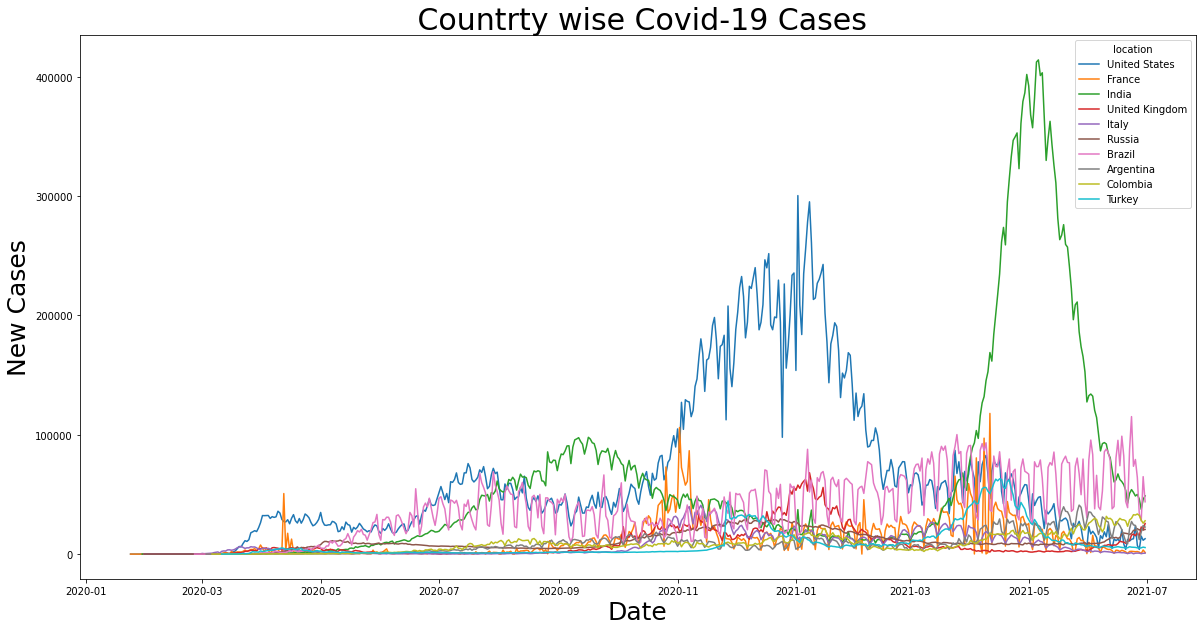

In [26]:
#Covid Cases
plt.figure(figsize=(20,10))
sns.lineplot(x="ds", y="y",hue="location", data=df_new_cases);
plt.xlabel("Date", size=25)
plt.ylabel("New Cases", size=25)
plt.title(" Countrty wise Covid-19 Cases", size=30)

# 2. FORCASTING OF INDIA:


1.   New Cases
2.   New Deaths
3.   People fully vaccinated



In [33]:
dfi = df.copy()
# select rows with location India
dfi = dfi.query('location=="India"')
dfi

,iso_code,continent,location,ds,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
41104,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41105,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41106,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41107,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41108,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41617,IND,Asia,India,2021-06-26,30233183.0,50040.0,395751.0,1258.0,2243444.0,401811892.0,0.028,35.9,314841384.0,260253182.0,54588202.0,8179856.0
41618,IND,Asia,India,2021-06-27,30279331.0,46148.0,396730.0,979.0,2453209.0,404265101.0,0.026,38.5,318030412.0,262916313.0,55114099.0,3189028.0
41619,IND,Asia,India,2021-06-28,30316897.0,37566.0,397637.0,907.0,2106178.0,406371279.0,0.024,41.2,321423578.0,265545768.0,55877810.0,3393166.0
41620,IND,Asia,India,2021-06-29,30362848.0,45951.0,398454.0,817.0,1768008.0,408139287.0,NaN,NaN,327423913.0,270178001.0,57245912.0,6000335.0


In [34]:
dfi.describe()

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
count,5.180000e+02,518.000000,477.000000,477.000000,4.480000e+02,4.580000e+02,466.000000,466.000000,1.620000e+02,1.620000e+02,1.330000e+02,1.570000e+02
mean,8.050358e+06,58709.718147,118046.232704,837.440252,8.914279e+05,1.337829e+08,0.066294,23.401931,1.100792e+08,9.011473e+07,2.431757e+07,2.017775e+06
std,8.511653e+06,86274.726009,102077.359670,1093.394840,6.377170e+05,1.193798e+08,0.047171,15.350817,9.894857e+07,7.996528e+07,1.866180e+07,1.644412e+06
min,1.000000e+00,0.000000,1.000000,-1.000000,1.570000e+02,6.500000e+03,0.016000,4.400000,0.000000e+00,0.000000e+00,7.668000e+03,5.671000e+03
25%,2.595965e+05,9104.000000,21129.000000,140.000000,3.489280e+05,1.316297e+07,0.034000,11.725000,1.323952e+07,1.129286e+07,7.221362e+06,4.878960e+05
50%,7.338782e+06,29033.000000,124315.000000,470.000000,8.665235e+05,1.181545e+08,0.051000,19.700000,8.863807e+07,7.735002e+07,1.917034e+07,2.019723e+06
75%,1.100230e+07,64692.000000,157435.000000,979.000000,1.157644e+06,2.189850e+08,0.085000,29.475000,1.875178e+08,1.463019e+08,4.256124e+07,2.925356e+06
max,3.041163e+07,414188.000000,399459.000000,7374.000000,3.740296e+06,4.081393e+08,0.227000,62.000000,3.291581e+08,2.714100e+08,5.774812e+07,9.027343e+06


### 1. New Cases

FORCASTING NEW CASES

*   no null
*   no -ve



In [35]:
dfinc = dfi[['ds','new_cases']]
dfinc

,ds,new_cases
41104,2020-01-30,1.0
41105,2020-01-31,0.0
41106,2020-02-01,0.0
41107,2020-02-02,1.0
41108,2020-02-03,1.0
...,...,...
41617,2021-06-26,50040.0
41618,2021-06-27,46148.0
41619,2021-06-28,37566.0
41620,2021-06-29,45951.0


In [36]:
dfinc = dfinc.rename(columns = {'new_cases':'y'})
dfinc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 41104 to 41621
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      518 non-null    datetime64[ns]
 1   y       518 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.1 KB


In [37]:
dfinc['y'] = dfinc['y'].astype(int)
dfinc['ds'] = pd.to_datetime(dfinc['ds'])
dfinc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 41104 to 41621
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      518 non-null    datetime64[ns]
 1   y       518 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.1 KB


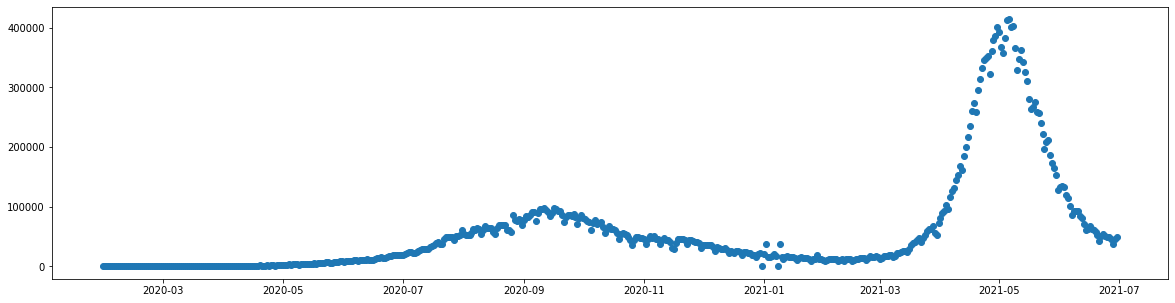

In [38]:
# Plotting
plt.figure(figsize = (20,5))
plt.scatter(dfinc['ds'],dfinc['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds          trend  ...  multiplicative_terms_upper           yhat
0   2020-10-24   49905.563210  ...                         0.0   53341.977561
1   2020-10-25   49523.197238  ...                         0.0   47988.096090
2   2020-10-26   49140.831265  ...                         0.0   38838.852565
3   2020-10-27   48758.465293  ...                         0.0   47424.877115
4   2020-10-28   48376.099321  ...                         0.0   53247.952784
..         ...            ...  ...                         ...            ...
275 2021-07-26 -198355.547117  ...                         0.0 -208657.525817
276 2021-07-27 -205183.691102  ...                         0.0 -206517.279280
277 2021-07-28 -212011.835086  ...                         0.0 -207139.981623
278 2021-07-29 -218839.979070  ...                         0.0 -216589.291470
279 2021-07-30 -225668.123055  ...                         0.0 -223056.410445

[280 rows x 16 columns]


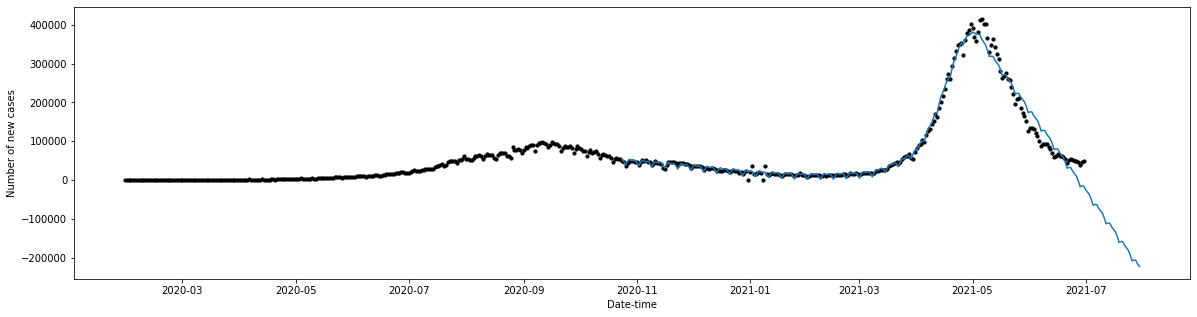

In [39]:
dfinc2 = dfinc.tail(250)
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.4)
model.fit(dfinc2)
x=model.make_future_dataframe(periods=30,freq='D')
forecast=model.predict(x)
plt.figure(figsize=(20,5))
plt.scatter(dfinc['ds'],dfinc['y'],s=10,c='k')
plt.plot(forecast['ds'], forecast['yhat'])
plt.xlabel('Date-time')
plt.ylabel('Number of new cases')
print(forecast)

Text(123.0, 0.5, 'Number of new cases')

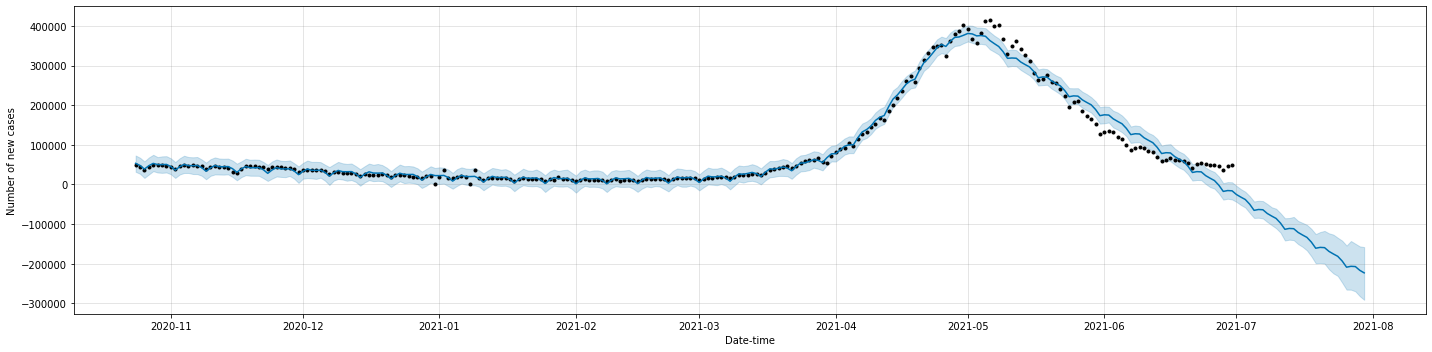

In [40]:
model.plot(forecast,figsize=(20,5));
plt.xlabel('Date-time')
plt.ylabel('Number of new cases')

Figure(1440x576)


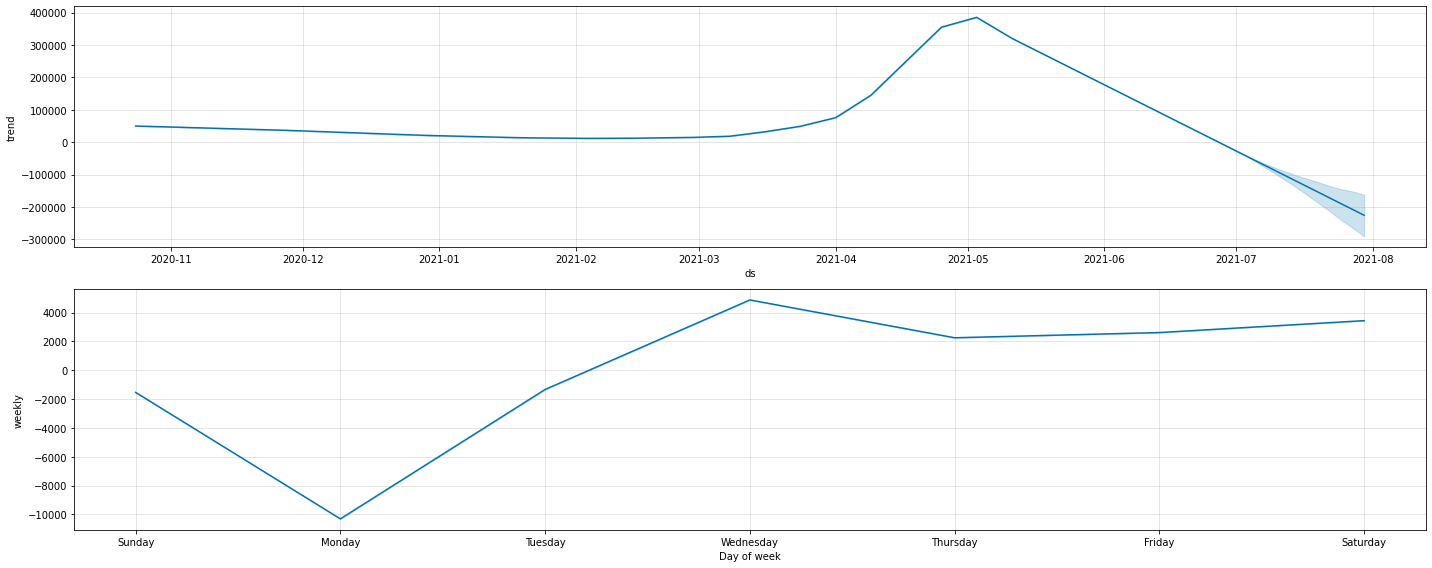

In [41]:
b = model.plot_components(forecast, figsize=(20,8));
print(b)

## 2.  New Deaths

In [72]:
dfindc = dfi[['ds','new_deaths']]

In [73]:
dfindc = dfindc.dropna()
dfindc

,ds,new_deaths
41145,2020-03-11,1.0
41146,2020-03-12,0.0
41147,2020-03-13,1.0
41148,2020-03-14,0.0
41149,2020-03-15,0.0
...,...,...
41617,2021-06-26,1258.0
41618,2021-06-27,979.0
41619,2021-06-28,907.0
41620,2021-06-29,817.0


In [74]:
dfindc = dfindc.loc[dfindc['new_deaths']>=0]
dfindc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 41145 to 41621
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          476 non-null    datetime64[ns]
 1   new_deaths  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.2 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 41145 to 41621
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      476 non-null    datetime64[ns]
 1   y       476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.2 KB
None


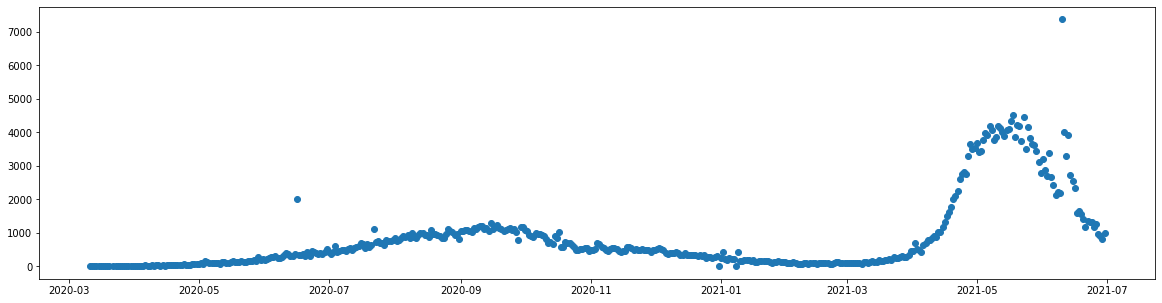

In [75]:
dfindc = dfindc.rename(columns = {'new_deaths':'y'})
print(dfindc.info())

dfindc['y'] = dfindc['y'].astype(int)
dfindc['ds'] = pd.to_datetime(dfindc['ds'])

#plotting given data of death cases
plt.figure(figsize = (20,5))
plt.scatter(dfindc['ds'],dfindc['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds       trend  ...  multiplicative_terms_upper        yhat
0   2020-11-13  551.173299  ...                         0.0  595.254723
1   2020-11-14  545.274450  ...                         0.0  547.170872
2   2020-11-15  539.375600  ...                         0.0  514.155446
3   2020-11-16  533.476750  ...                         0.0  420.931250
4   2020-11-17  527.577901  ...                         0.0  526.441826
..         ...         ...  ...                         ...         ...
255 2021-07-26 -644.692576  ...                         0.0 -757.238076
256 2021-07-27 -715.119520  ...                         0.0 -716.255596
257 2021-07-28 -785.546465  ...                         0.0 -805.949508
258 2021-07-29 -855.973410  ...                         0.0 -742.646484
259 2021-07-30 -926.400354  ...                         0.0 -882.318930

[260 rows x 16 columns]


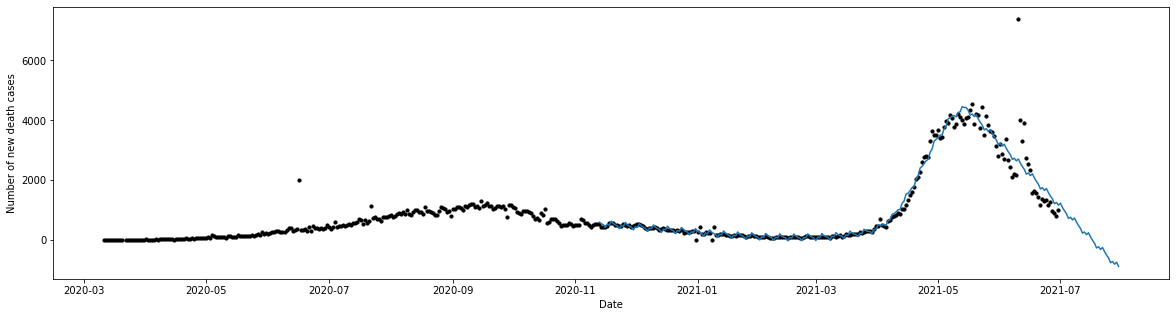

In [81]:
# Forecasting

from fbprophet import Prophet
model2=Prophet(changepoint_prior_scale=0.5)
model2.fit(dfindc.tail(230))
x=model2.make_future_dataframe(periods=30,freq='D')
forecast2=model2.predict(x)
plt.figure(figsize=(20,5))
plt.scatter(dfindc['ds'],dfindc['y'],s=10,c='k')
plt.plot(forecast2['ds'], forecast2['yhat'])
plt.xlabel('Date')
plt.ylabel('Number of new death cases')
print(forecast2)


Text(135.5, 0.5, 'Number of new death cases')

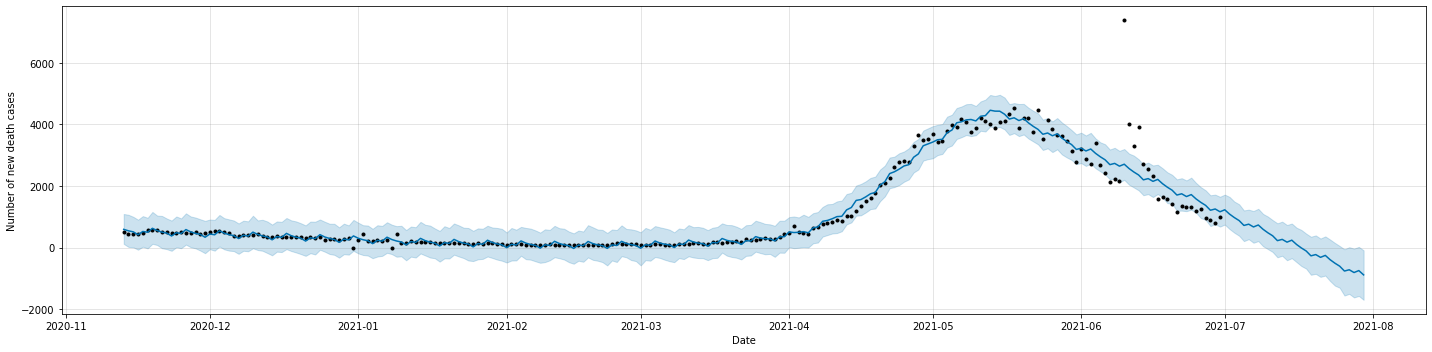

In [82]:
model2.plot(forecast2,figsize=(20,5));
plt.xlabel('Date')
plt.ylabel('Number of new death cases')

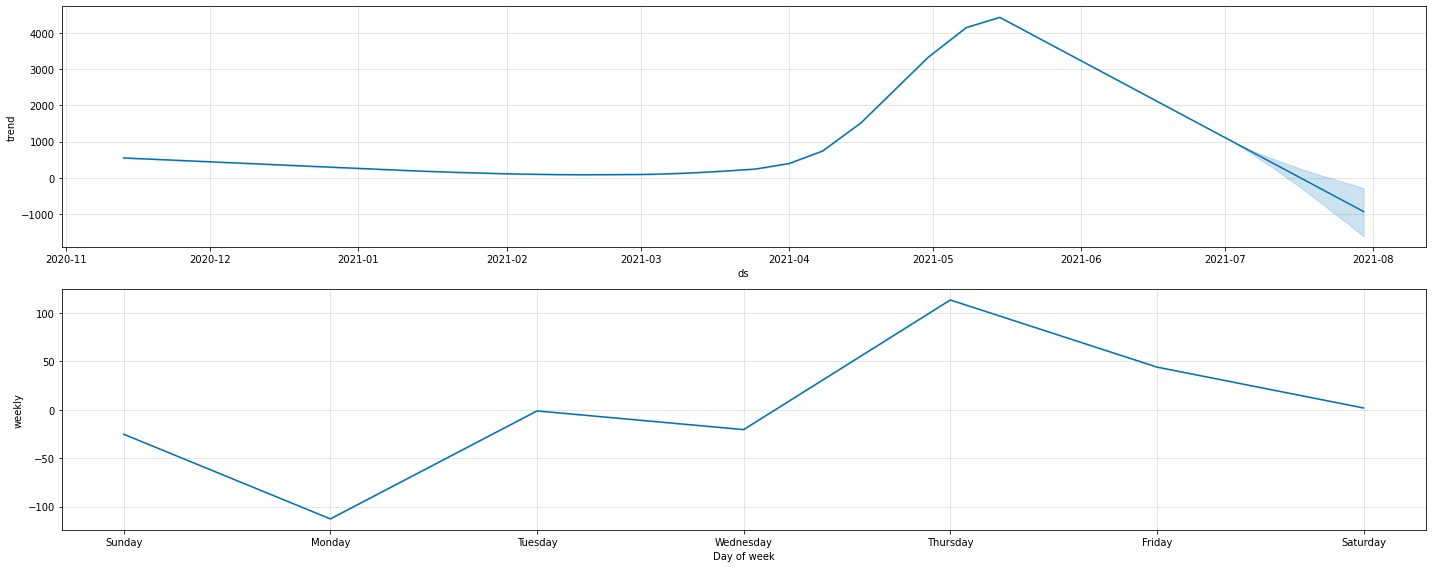

In [83]:
model2.plot_components(forecast2, figsize=(20,8));

## 3. People Fully Vaccinated

In [87]:
dfipvf = dfi[['ds','people_fully_vaccinated']]
dfipvf = dfipvf.dropna()
dfipvf

,ds,people_fully_vaccinated
41484,2021-02-13,7668.0
41486,2021-02-15,98118.0
41487,2021-02-16,216339.0
41488,2021-02-17,342116.0
41489,2021-02-18,464932.0
...,...,...
41617,2021-06-26,54588202.0
41618,2021-06-27,55114099.0
41619,2021-06-28,55877810.0
41620,2021-06-29,57245912.0


In [88]:
dfipvf = dfipvf.loc[dfipvf['people_fully_vaccinated']>=0]
dfipvf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 41484 to 41621
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ds                       133 non-null    datetime64[ns]
 1   people_fully_vaccinated  133 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 41484 to 41621
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      133 non-null    datetime64[ns]
 1   y       133 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB
None


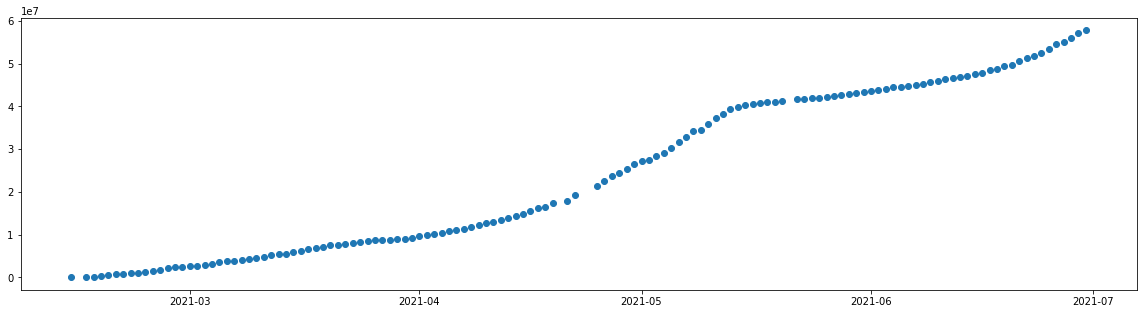

In [89]:
dfipvf = dfipvf.rename(columns = {'people_fully_vaccinated':'y'})
print(dfipvf.info())

dfipvf['y'] = dfipvf['y'].astype(int)
dfipvf['ds'] = pd.to_datetime(dfipvf['ds'])

#plotting given data of death cases
plt.figure(figsize = (20,5))
plt.scatter(dfipvf['ds'],dfipvf['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds       trend  ...  multiplicative_terms_upper        yhat
0   2020-11-13  551.173299  ...                         0.0  595.254723
1   2020-11-14  545.274450  ...                         0.0  547.170872
2   2020-11-15  539.375600  ...                         0.0  514.155446
3   2020-11-16  533.476750  ...                         0.0  420.931250
4   2020-11-17  527.577901  ...                         0.0  526.441826
..         ...         ...  ...                         ...         ...
255 2021-07-26 -644.692576  ...                         0.0 -757.238076
256 2021-07-27 -715.119520  ...                         0.0 -716.255596
257 2021-07-28 -785.546465  ...                         0.0 -805.949508
258 2021-07-29 -855.973410  ...                         0.0 -742.646484
259 2021-07-30 -926.400354  ...                         0.0 -882.318930

[260 rows x 16 columns]


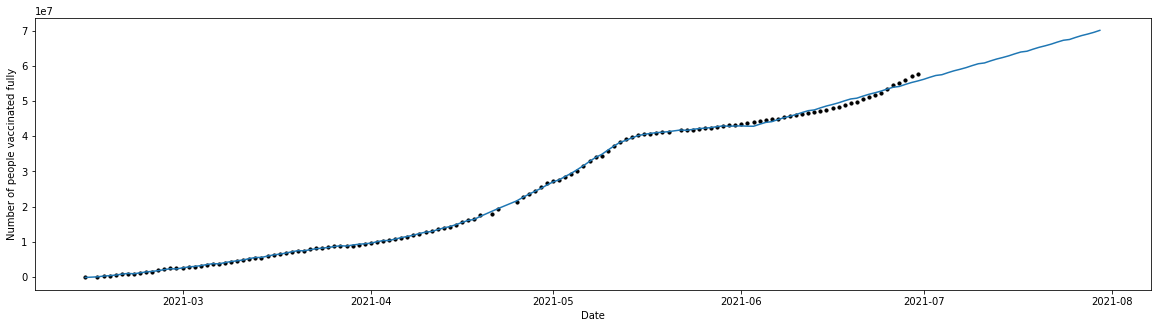

In [90]:
from fbprophet import Prophet
model3=Prophet(changepoint_prior_scale=0.5)
model3.fit(dfipvf.tail(230))
x=model3.make_future_dataframe(periods=30,freq='D')
forecast3=model3.predict(x)
plt.figure(figsize=(20,5))
plt.scatter(dfipvf['ds'],dfipvf['y'],s=10,c='k')
plt.plot(forecast3['ds'], forecast3['yhat'])
plt.xlabel('Date')
plt.ylabel('Number of people vaccinated fully')
print(forecast2)

Text(162.625, 0.5, 'Number of people vaccinated fully')

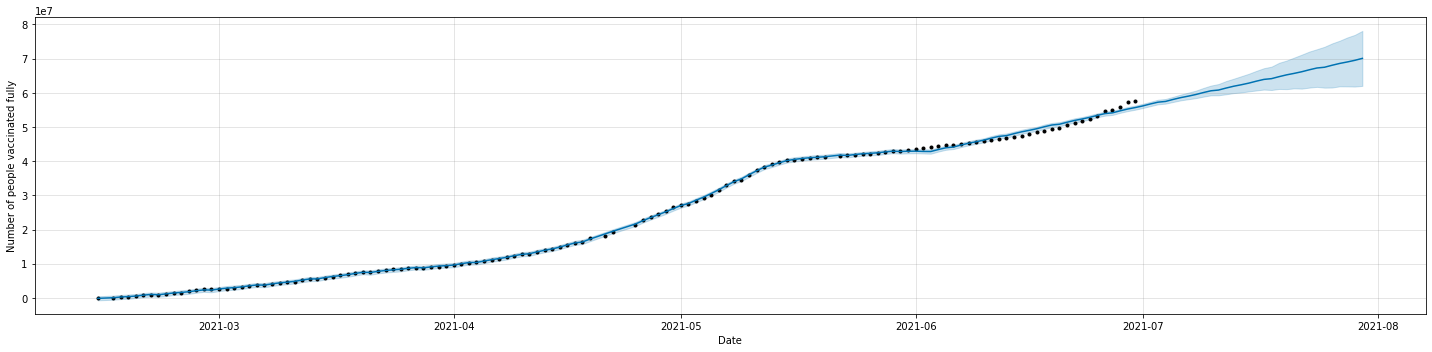

In [91]:
model3.plot(forecast3,figsize=(20,5));
plt.xlabel('Date')
plt.ylabel('Number of people vaccinated fully')

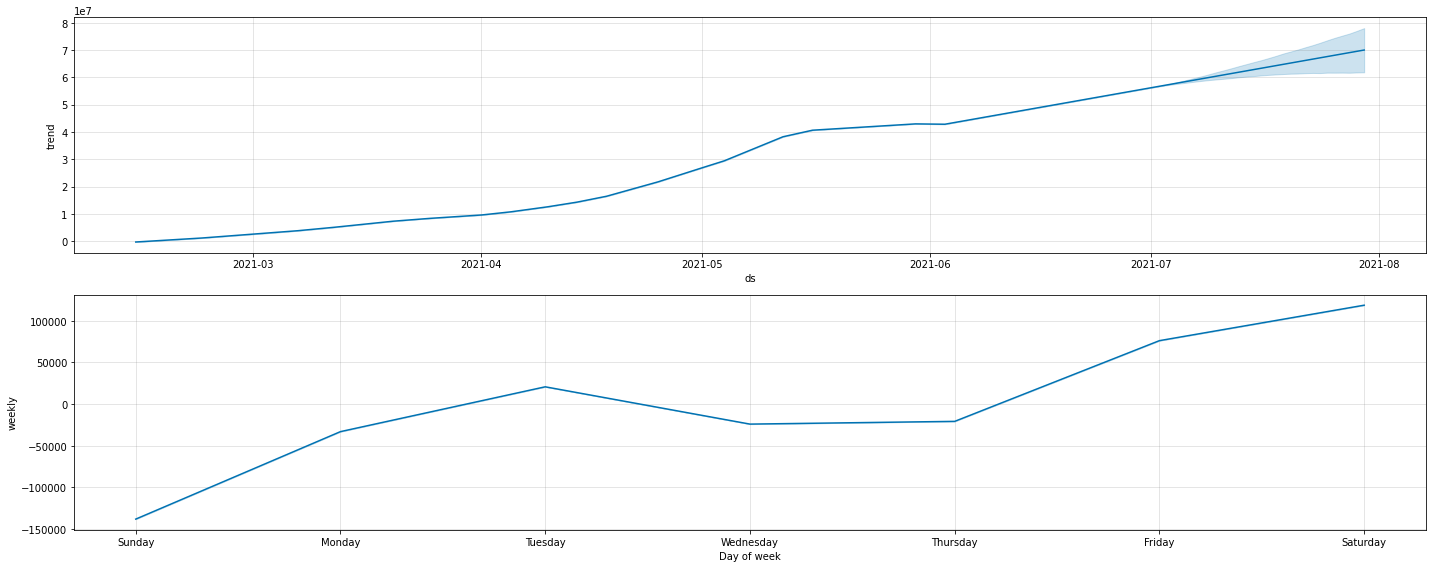

In [92]:
model3.plot_components(forecast3, figsize=(20,8));